In [59]:
import pickle

from utils import BMML2_open_tests as test
from utils import yusov as model
from utils import dataset
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
from PIL.ImageOps import grayscale
from PIL import Image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
test.test_e_step()
test.test_m_stap()
test.test_e_step_time()
test.test_m_step_time()
test.test_output_shape()
test.test_python3()

iter 1 out of 1 elbo normalized -20.118736351572032 elbo diff 4331.491658661942
iter 1 out of 1 elbo normalized -20.201153424685746 elbo diff 4331.3879554147425


In [108]:
from PIL import Image

fg = grayscale(Image.open("./imgs/foreground5.png"))
fg = fg.resize((32, 32))
fg.load()
img_fg = np.asarray(fg, dtype="int32")

In [114]:
255 - img_fg

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=int32)

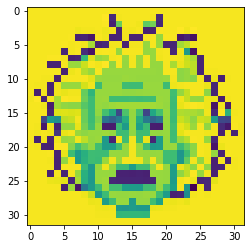

In [113]:
plt.imshow(255-img_fg)

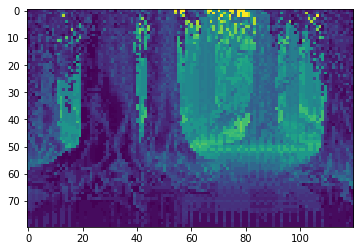

In [102]:
from PIL.ImageOps import grayscale

bg = grayscale(Image.open("./imgs/background4.png"))
bg = bg.resize((120, 80))
bg.load()
img_bg = np.asarray(bg, dtype="int32")

plt.imshow(img_bg)

In [77]:
from utils import dataset

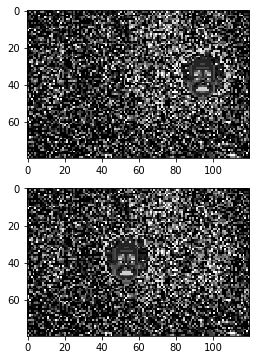

In [119]:
num = 2

fig, axes = plt.subplots(nrows=num, figsize=(4, 3*num))
imgs = dataset.generate_images(255-img_fg, img_bg, num)

for img, ax in zip(imgs, axes):
    ax.imshow(img, cmap="gray")

## Эксперименты с тестовыми изображениями

### Лицо

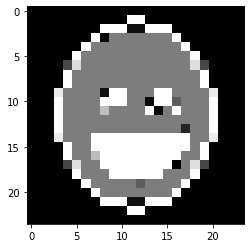

In [3]:
fg = grayscale(Image.open("./imgs/foreground6.png"))

h, w = 24, 24
fg = fg.resize((h, w))
fg.load()
img_fg = np.asarray(fg, dtype="int32")
img_fg = 255 - img_fg

plt.imshow(img_fg, cmap="gray")

### Фон

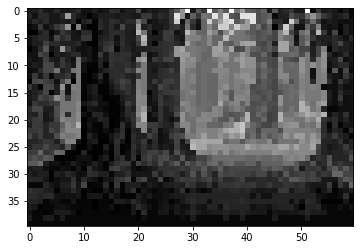

In [4]:
bg = grayscale(Image.open("./imgs/background4.png"))

H, W = 40, 60
bg = bg.resize((W, H))
bg.load()
img_bg = np.asarray(bg, dtype="int32")

plt.imshow(img_bg, cmap="gray")

### сгенерированные изображения

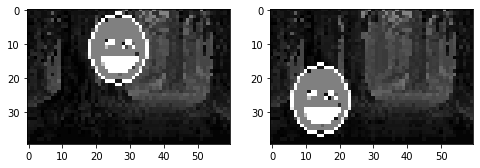

In [5]:
num = 100
generated_imgs = dataset.generate_images(img_fg, img_bg, num)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 3))
ax1.imshow(generated_imgs[..., 0], cmap="gray")
ax2.imshow(generated_imgs[..., -1], cmap="gray")

## Тестирование алгоритма на сгенерированных изображениях

In [6]:
F, B, s, A, LL = model.run_EM(generated_imgs, h, w, tolerance=0.00001, max_iter=15)

Text(0.5, 1.0, 'Estimated face')

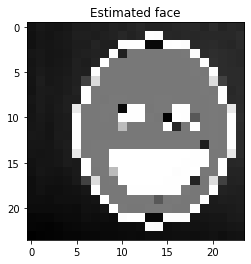

In [7]:
plt.imshow(F, cmap="gray")
plt.title("Estimated face")

Text(0.5, 1.0, 'Estimated background')

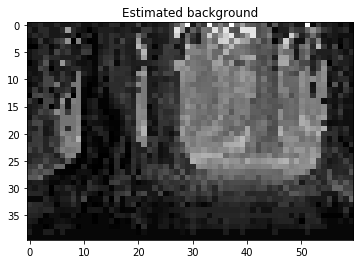

In [213]:
plt.imshow(B, cmap="gray")
plt.title("Estimated background")

## ЕМ алгоритм с перезапуском

In [214]:
results = []

for i in range(10):
    print("step", i)
    F, B, s, A, LL = model.run_EM(generated_imgs, h, w, tolerance=0.0001, max_iter=15)
    results.append((F, B, s, A, LL))

step 0
iter 1 out of 15 elbo normalized 1847.637341572137 elbo diff 3120500.997964045
iter 2 out of 15 elbo normalized 1905.1771092956458 elbo diff 5753.97677235087
iter 3 out of 15 elbo normalized 1991.8495138901317 elbo diff 8667.2404594486
iter 4 out of 15 elbo normalized 2063.8963740583836 elbo diff 7204.686016825173
iter 5 out of 15 elbo normalized 2176.4432187159355 elbo diff 11254.684465755214
iter 6 out of 15 elbo normalized 2188.519079826729 elbo diff 1207.5861110793194
iter 7 out of 15 elbo normalized 2192.6357719144744 elbo diff 411.66920877454686
iter 8 out of 15 elbo normalized 2192.9370575289427 elbo diff 30.128561446850654
iter 9 out of 15 elbo normalized 2193.395396053844 elbo diff 45.83385249011917
iter 10 out of 15 elbo normalized 2193.398510454318 elbo diff 0.3114400474005379
iter 11 out of 15 elbo normalized 2193.3985104543185 elbo diff 5.820766091346741e-11
step 1
iter 1 out of 15 elbo normalized 1859.7785661403302 elbo diff 3025336.58744781
iter 2 out of 15 elbo n

In [52]:
with open("./logs/10_runs_results.pickle", "rb") as f:
    results = pickle.load(f)

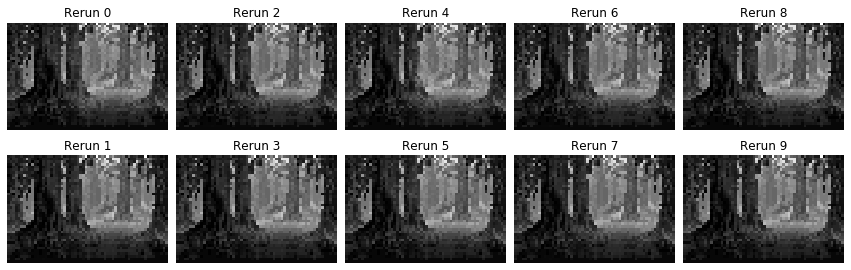

In [31]:
nrows = 2
fig, axes = plt.subplots(ncols=5, nrows=nrows, figsize=(3*5, 3*2-1.5))

for i, result in enumerate(results):
    F, B, s, A, LL = result
    ax = axes[i%nrows, i//nrows]
    ax.set_title("Rerun "+str(i))
    ax.axis(False)
    ax.imshow(B, cmap="gray")
    
plt.subplots_adjust(wspace=0.05, hspace=0.18)
plt.savefig("./imgs/background_estimates.png", bbox_inches='tight', pad_inches=0)

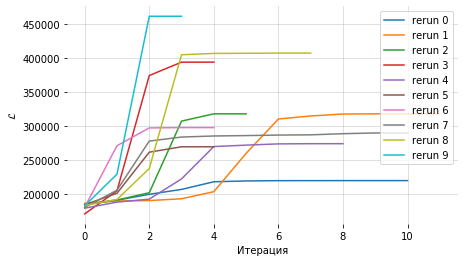

In [58]:
fig, ax = plt.subplots(figsize=(7, 4))

for i, result in enumerate(results):
    LL = result[-1]
    ax.plot(LL, label=f"rerun {i}")
    ax.grid(True, alpha=0.5)

ax.legend()
ax.set_xlabel("Итерация")
ax.set_ylabel(r"$\mathcal{L}$")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig("./imgs/losses.png", bbox_inches="tight", pad_inches=0, dpi=300)

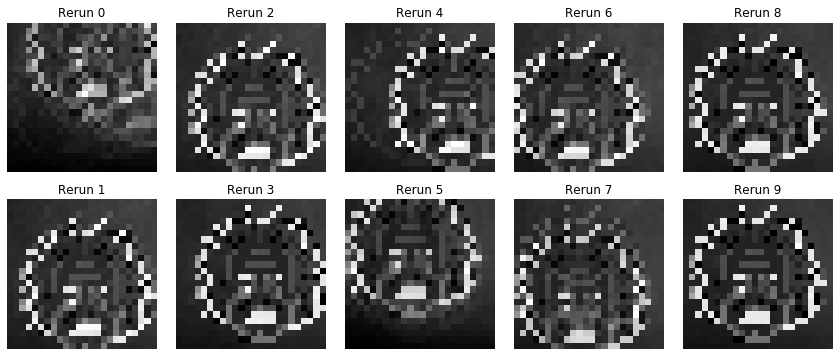

In [27]:
nrows = 2
fig, axes = plt.subplots(ncols=5, nrows=nrows, figsize=(3*5, 3*2))

for i, result in enumerate(results):
    F, B, s, A, LL = result
    ax = axes[i%nrows, i//nrows]
    ax.set_title("Rerun "+str(i))
    ax.imshow(F, cmap="gray")
    ax.axis(False)
    
plt.subplots_adjust(wspace=0.05, hspace=0.18)
plt.savefig("./imgs/einstein_estimates.png", bbox_inches='tight', pad_inches=0)

In [218]:
F, B, s, A, LL = model.run_EM_with_restarts(generated_imgs, h, w)

iter 1 out of 50 elbo normalized 1862.2564636233174 elbo diff 2988067.56278999
iter 2 out of 50 elbo normalized 1897.9366617014543 elbo diff 3568.019807813718
iter 3 out of 50 elbo normalized 1901.100493148519 elbo diff 316.38314470645855
iter 4 out of 50 elbo normalized 1901.149282144648 elbo diff 4.878899612900568
iter 5 out of 50 elbo normalized 1901.3339957988164 elbo diff 18.47136541682994
iter 6 out of 50 elbo normalized 1901.3340604478444 elbo diff 0.00646490280632861
iter 7 out of 50 elbo normalized 1901.3340633141486 elbo diff 0.0002866304130293429
iter 1 out of 50 elbo normalized 1846.2325359332913 elbo diff 3227036.813732162
iter 2 out of 50 elbo normalized 2707.9656011711713 elbo diff 86173.306523788
iter 3 out of 50 elbo normalized 3679.036305856569 elbo diff 97107.07046853978
iter 4 out of 50 elbo normalized 3679.036305856569 elbo diff 0.0
iter 1 out of 50 elbo normalized 1804.803984265094 elbo diff 3143499.925069465
iter 2 out of 50 elbo normalized 2128.3788333953444 elb

In [219]:
with open("./logs/em_with_restarts_result.pickle", "wb") as f:
    pickle.dump((F, B, s, A, LL), f)

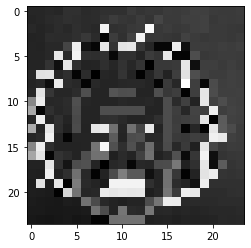

In [223]:
plt.imshow(F, cmap="gray")

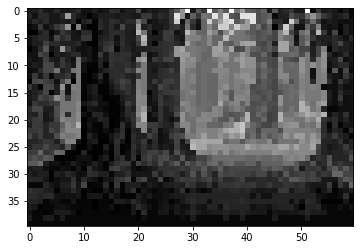

In [222]:
plt.imshow(B, cmap="gray")

## Выборка с зашумлением

noise: 0.00392156862745098 num images: 10
iter 1 out of 10 elbo normalized 843.6507655627167 elbo diff 180891.1265668106
iter 2 out of 10 elbo normalized 843.6507655627167 elbo diff 180891.1265668106
iter 3 out of 10 elbo normalized 2017.5138275976162 elbo diff 11738.630620348995
iter 4 out of 10 elbo normalized 2017.5138275976162 elbo diff 11738.630620348995
iter 5 out of 10 elbo normalized 2262.4075687163545 elbo diff 2448.937411187384
iter 6 out of 10 elbo normalized 2262.4075687163545 elbo diff 2448.937411187384
iter 7 out of 10 elbo normalized 2505.0270511432263 elbo diff 2426.1948242687176
iter 8 out of 10 elbo normalized 2505.0270511432263 elbo diff 2426.1948242687176
iter 9 out of 10 elbo normalized 2505.0270511432263 elbo diff 0.0
iter 1 out of 10 elbo normalized 839.9840473185902 elbo diff 186237.2710934321
iter 2 out of 10 elbo normalized 839.9840473185902 elbo diff 186237.2710934321
iter 3 out of 10 elbo normalized 944.3481902638172 elbo diff 1043.6414294522692
iter 4 out o

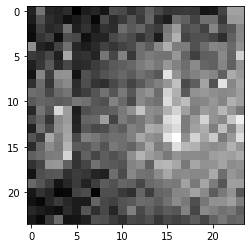

In [11]:
noise_images = []
results = []

for noise in (1, 10, 20, 50, 100, 150, 200):
    noise = 1.0 * noise / 255.
    noise_images_ = []
    results_ = []
    
    for num in (10, 50, 100, 200, 500):
        print("noise:", noise, "num images:", num)
        data = dataset.generate_images(img_fg, img_bg, num)
        for img_i in range(num):
            data[:, :, img_i] = dataset.add_noise(data[:, :, img_i], noise)
        noise_images_.append(data)
        F, B, s, A, LL = model.run_EM_with_restarts(data, h, w, max_iter=10, n_restarts=3)
        results_.append((F, B, s, A, LL))
        plt.imshow(F, cmap="gray")
    
    results.append(results_)
    noise_images.append(noise_images_)

In [12]:
with open("./logs/noise_image_experiment_results.pickle", "wb") as f:
    pickle.dump((noise_images, results), f)

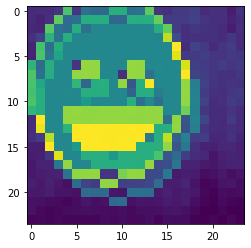

In [13]:
F, B, s, A, LL = results[0][0]
plt.imshow(F)

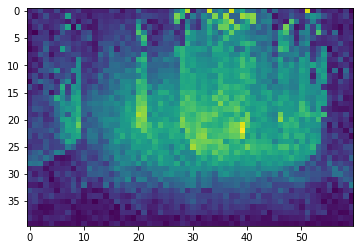

In [14]:
data = dataset.generate_images(img_fg, img_bg, 100)
for img_i in range(10):
    data[:, :, img_i] = dataset.add_noise(data[:, :, img_i], 200./255)
    
plt.imshow(np.mean(data, axis=-1))

## Работа алгоритма на данных с задания

In [15]:
# data = np.load("./data/data_shad19_1000.npy")
# F, B, s, A, LL = model.run_EM_with_restarts(data, h, w, max_iter=10, n_restarts=1)

iter 1 out of 10 elbo normalized -131880.0849458323 elbo diff 24700254.239209637
iter 2 out of 10 elbo normalized -131880.0849458323 elbo diff 24700254.239209637
iter 3 out of 10 elbo normalized -131869.11727021038 elbo diff 10967.675621926785
iter 4 out of 10 elbo normalized -131869.11727021038 elbo diff 10967.675621926785
iter 5 out of 10 elbo normalized -131866.53198419677 elbo diff 2585.2860135883093
iter 6 out of 10 elbo normalized -131866.53198419677 elbo diff 2585.2860135883093
iter 7 out of 10 elbo normalized -131865.7114894342 elbo diff 820.4947625696659
iter 8 out of 10 elbo normalized -131865.7114894342 elbo diff 820.4947625696659
iter 9 out of 10 elbo normalized -131865.2529802851 elbo diff 458.5091491341591
iter 10 out of 10 elbo normalized -131865.2529802851 elbo diff 458.5091491341591


### Считаем в колабе, а затем скачиваем

In [16]:
with open("./data/results.pickle", "rb") as f:
    F, B, s, A, LL = pickle.load(f)

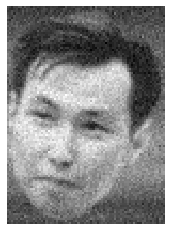

In [17]:
plt.imshow(F, cmap="gray")
plt.axis(False)
plt.savefig("./imgs/villain_face.png", bbox_inches='tight', pad_inches=0)

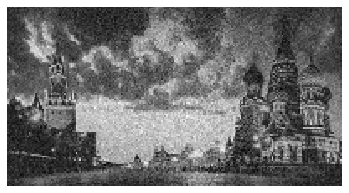

In [18]:
plt.imshow(B, cmap="gray")
plt.axis(False)
plt.savefig("./imgs/villain_bg.png", bbox_inches='tight', pad_inches=0)

In [19]:
with open("./data/results_MAP.pickle", "rb") as f:
    F, B, s, A, LL = pickle.load(f)

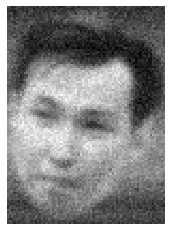

In [20]:
plt.imshow(F, cmap="gray")
plt.axis(False)
plt.savefig("./imgs/villain_face_MAP.png", bbox_inches='tight', pad_inches=0)

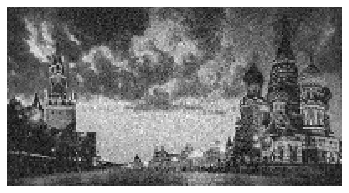

In [21]:
plt.imshow(B, cmap="gray")
plt.axis(False)
plt.savefig("./imgs/villain_bg_MAP.png", bbox_inches='tight', pad_inches=0)

## Работа алгоритма для разных зашумлений

In [39]:
with open("./logs/noise_image_experiment_results.pickle", "rb") as f:
    images, results = pickle.load(f)

In [40]:
n_noises = len(results)
n_images = len(results[0])

print(n_noises, n_images)

7 5


In [41]:
noises = (1, 10, 20, 50, 100, 150, 200)
image_nums = (10, 50, 100, 200, 500)

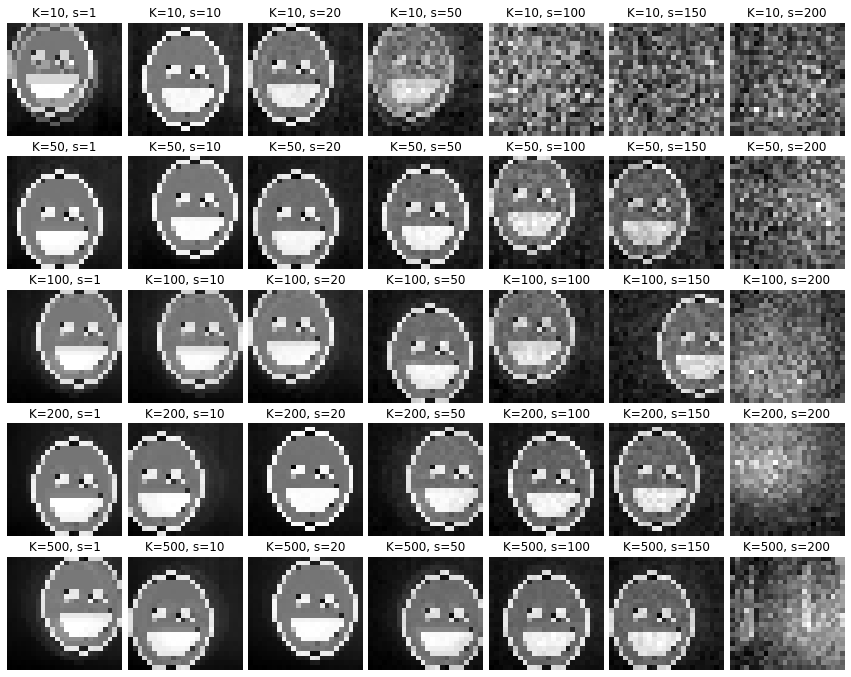

In [5]:
fig, axes = plt.subplots(nrows=n_images, ncols=n_noises, figsize=(n_images*3, n_noises*1.7), )

for i in range(n_images):
    for j in range(n_noises):
        F, B, s, A, LL = results[j][i]
        K = image_nums[i]
        s = noises[j]
        ax = axes[i, j]
        ax.imshow(F, cmap="gray", aspect='auto')
        ax.set_title(f"K={K}, s={s}")
        ax.set_axis_off()
        
plt.subplots_adjust(wspace=0.05, hspace=0.18)
fig.savefig("./imgs/estimations_noise_samples.png", bbox_inches='tight', pad_inches=0)

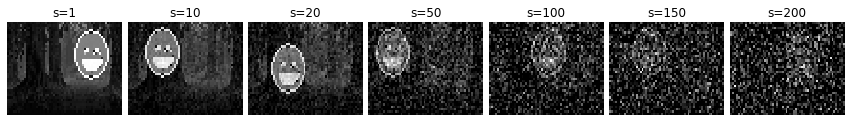

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=n_noises, figsize=(n_images*3, 1.7), )

i = 0
for j in range(n_noises):
    img = images[j][i][:, :, 0]
    K = image_nums[i]
    s = noises[j]
    ax = axes[j]
    ax.imshow(img, cmap="gray", aspect='auto')
    ax.set_title(f"s={s}")
    ax.set_axis_off()
        
plt.subplots_adjust(wspace=0.05, hspace=0.18)
fig.savefig("./imgs/noise_images_samples.png", bbox_inches='tight', pad_inches=0)